In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_child,family,is_alone,is_male,is_C,is_Q,is_S
0,0,3,22.0,1,0,7.2500,0,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,1,0,0,1


In [43]:
#CleanData
df['Embarked']=df['Embarked'].fillna('S')
df['Age']=df['Age'].interpolate()
df['is_child'] = df['Age'].apply(lambda x:1 if x <= 15 else 0)
df['family'] = df['SibSp'] + df['Parch']
df['is_alone'] = df['family'].apply(lambda x:1 if x == 0  else 0)
df['is_male'] = df['Sex'].apply(lambda x:1 if x == 'male'  else 0)
df=df.drop(['PassengerId','Name','Ticket','Cabin','Sex'], axis=1)
df=pd.get_dummies(df,prefix=['is'])

In [59]:
X, y = df.drop(['Survived'],axis=1), df['Survived']

In [60]:
train_X, test_X, train_y, test_y = train_test_split(X,y, train_size = 0.80, test_size = 0.20, stratify = y)

In [10]:
dftest=pd.read_csv('test.csv')
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


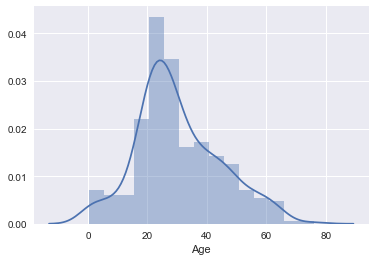

In [21]:
#DescribeData
sns.distplot(dftest[dftest['Age'].notnull()]['Age'])

In [28]:
#CleanData
dftest['Age']=dftest['Age'].interpolate()
dftest['Fare']=dftest['Fare'].fillna(dftest['Fare'].mean())
dftest['is_child'] = dftest['Age'].apply(lambda x:1 if x <= 15 else 0)
dftest['family'] = dftest['SibSp'] + dftest['Parch']
dftest['is_alone'] = dftest['family'].apply(lambda x:1 if x == 0  else 0)
dftest['is_male'] = dftest['Sex'].apply(lambda x:1 if x == 'male'  else 0)
dftest=dftest.drop(['PassengerId','Name','Ticket','Cabin','Sex'], axis=1)
dftest=pd.get_dummies(dftest,prefix=['is'])

NameError: name 'df' is not defined

In [40]:
dftest.head()

,Pclass,Age,SibSp,Parch,Fare,is_child,family,is_alone,is_male,is_C,is_Q,is_S
0,3,34.5,0,0,7.8292,0,0,1,1,0,1,0
1,3,47.0,1,0,7.0000,0,1,0,0,0,0,1
2,2,62.0,0,0,9.6875,0,0,1,1,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,1,0,0,1
4,3,22.0,1,1,12.2875,0,2,0,0,0,0,1


In [33]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Pclass      418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
is_child    418 non-null int64
family      418 non-null int64
is_alone    418 non-null int64
is_male     418 non-null int64
is_C        418 non-null uint8
is_Q        418 non-null uint8
is_S        418 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 30.7 KB


In [66]:
def sma_first_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    #classifier.y_pred = classifier.predict(test_X)
    classifier.scr = round(classifier.score(test_X, test_y)*100, 2)
    return classifier

In [67]:
acc_log_reg = sma_first_classifier(lambda: LogisticRegression(penalty='l2'))
acc_gbc = sma_first_classifier(lambda: GradientBoostingClassifier(learning_rate=0.3))
acc_svc = sma_first_classifier(SVC)
acc_linear_svc = sma_first_classifier(LinearSVC)
acc_knn = sma_first_classifier(KNeighborsClassifier)
acc_decision_tree = sma_first_classifier(DecisionTreeClassifier)
acc_random_forest = sma_first_classifier(lambda: RandomForestClassifier(n_estimators = 1000))
acc_gnb = sma_first_classifier(GaussianNB)
acc_perceptron = sma_first_classifier(Perceptron)
acc_sgd = sma_first_classifier(SGDClassifier)

In [69]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gradient Boosting Classifier', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    'Score': [acc_log_reg.scr, acc_gbc.scr, 
              acc_svc.scr, acc_linear_svc.scr, 
              acc_knn.scr, acc_decision_tree.scr, 
              acc_random_forest.scr, acc_gnb.scr, 
              acc_perceptron.scr, acc_sgd.scr]
    #'Pred_list': [acc_log_reg.y_pred, acc_gbc.y_pred, 
      #        acc_svc.y_pred, acc_linear_svc.y_pred, 
           #   acc_knn.y_pred, acc_decision_tree.y_pred, 
             # acc_random_forest.y_pred, acc_gnb.y_pred, 
        #      acc_perceptron.y_pred, acc_sgd.y_pred]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Random Forest,87.15
0,Logistic Regression,86.59
1,Gradient Boosting Classifier,86.03
7,Naive Bayes,82.12
5,Decision Tree,78.77
3,Linear SVC,74.86
4,KNN,71.51
8,Perceptron,70.95
2,Support Vector Machines,69.83
9,Stochastic Gradient Decent,61.45


In [70]:
classifier = RandomForestClassifier(n_estimators=1000)
classifier.fit(train_X, train_y)
predictor_rand_forest = classifier.predict(dftest)

In [76]:
test=pd.read_csv('test.csv')
predict = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictor_rand_forest
})

predict.to_csv('predictions', index = False)